<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-09 23:10:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  58.9MB/s    in 3.5s    

2024-12-09 23:10:47 (57.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


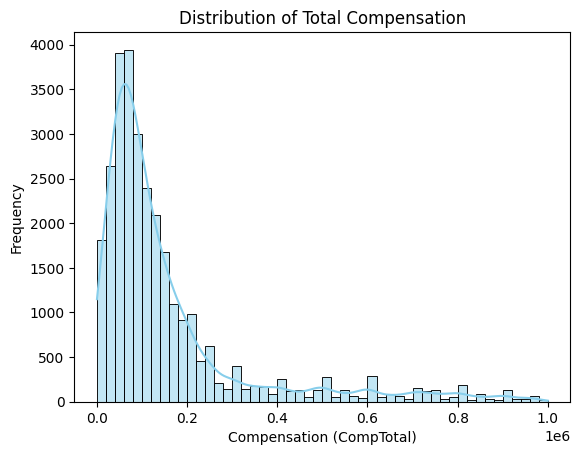

In [12]:
## Write your code here
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL AND CompTotal < 1000000;"
data = pd.read_sql_query(QUERY, conn)

sns.histplot(data['CompTotal'], bins=50, color='skyblue', kde=True)

#plt.hist(data['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


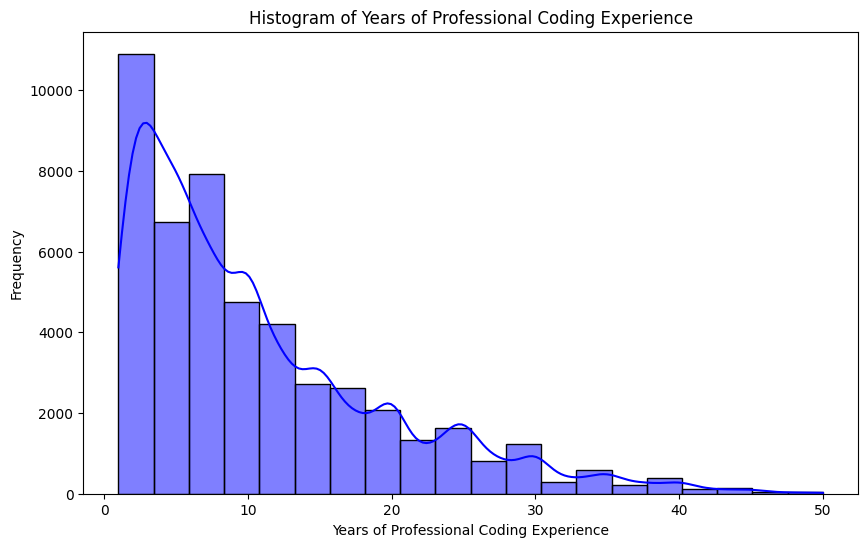

In [13]:
## Write your code here
query = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL;"
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric if needed
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['YearsCodePro'].dropna(), bins=20, kde=True, color='blue')
plt.title('Histogram of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


/tmp/ipykernel_1667/3597271523.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')


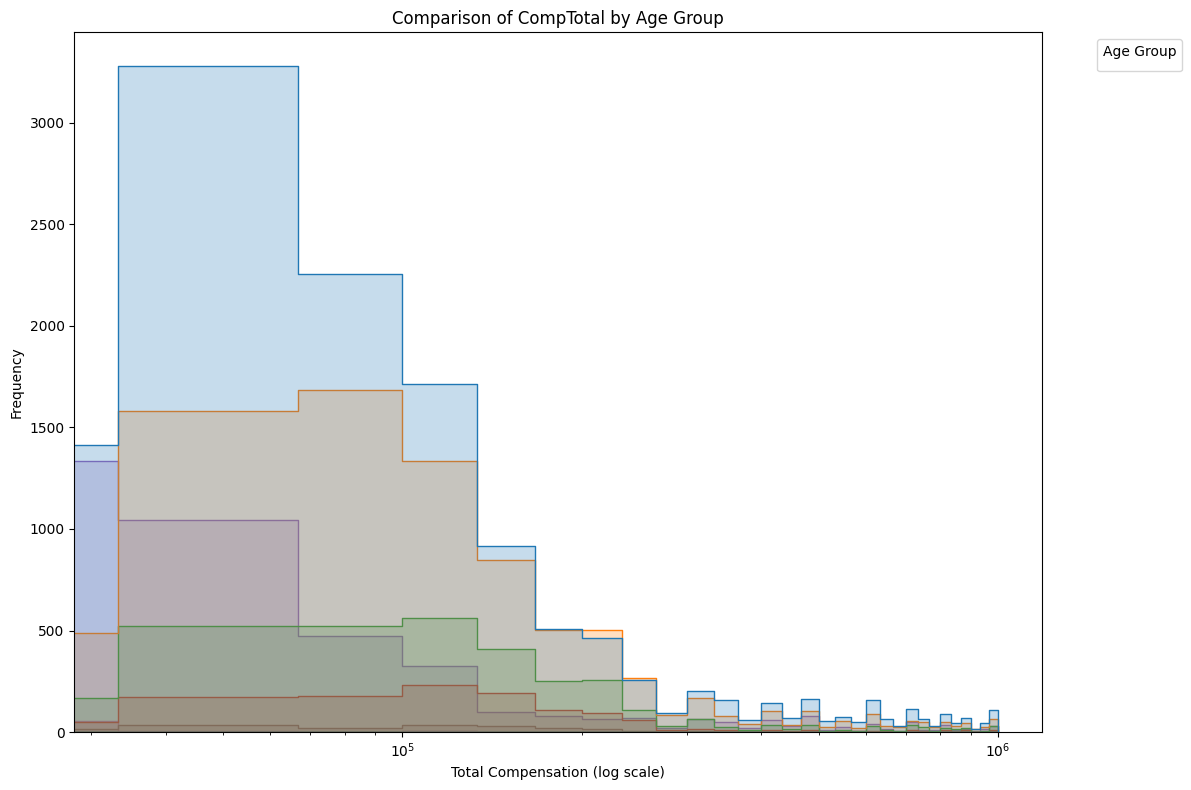

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
query = """
SELECT 
    CompTotal, 
    Age,
    CASE 
        WHEN Age = 'Under 18 years old' THEN 15
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = '65 years or older' THEN 70
        ELSE NULL
    END AS AgeNumeric
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)


# Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Handle invalid data by filtering out extreme values (optional, e.g., cap compensation at 1 million)
df = df[df['CompTotal'] <= 1_000_000]

# Plot histograms by Age group
plt.figure(figsize=(12, 8))
sns.histplot(
    data=df, 
    x='CompTotal', 
    hue='Age',  # Use the original Age column for categories
    bins=30, 
    kde=False, 
    element='step'
)
plt.title('Comparison of CompTotal by Age Group')
plt.xlabel('Total Compensation (log scale)')
plt.ylabel('Frequency')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')  # Use log scale for better visibility if data is skewed
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


/tmp/ipykernel_1667/2091624401.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group')


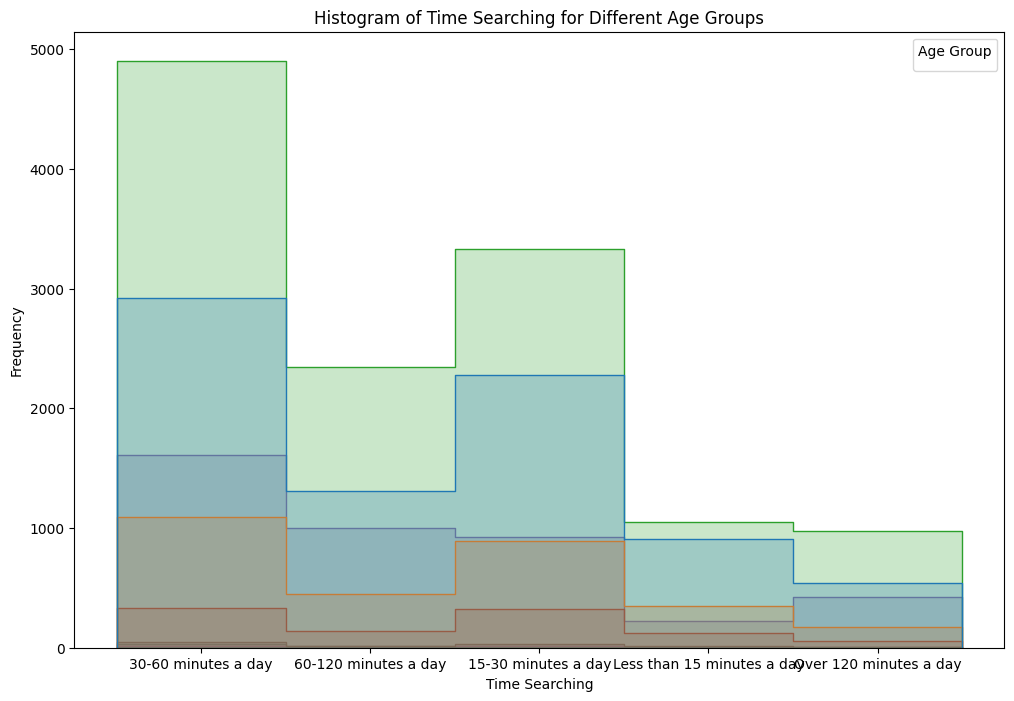

In [18]:
## Write your code here
# Query the data
query = "SELECT Age, TimeSearching FROM main WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL;"
df = pd.read_sql_query(query, conn)

# Plot histograms by Age group
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='TimeSearching', hue='Age', bins=20, kde=False, element='step')
plt.title('Histogram of Time Searching for Different Age Groups')
plt.xlabel('Time Searching')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


/tmp/ipykernel_1667/1751386982.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Count', y='DatabaseWantToWorkWith', palette='viridis')


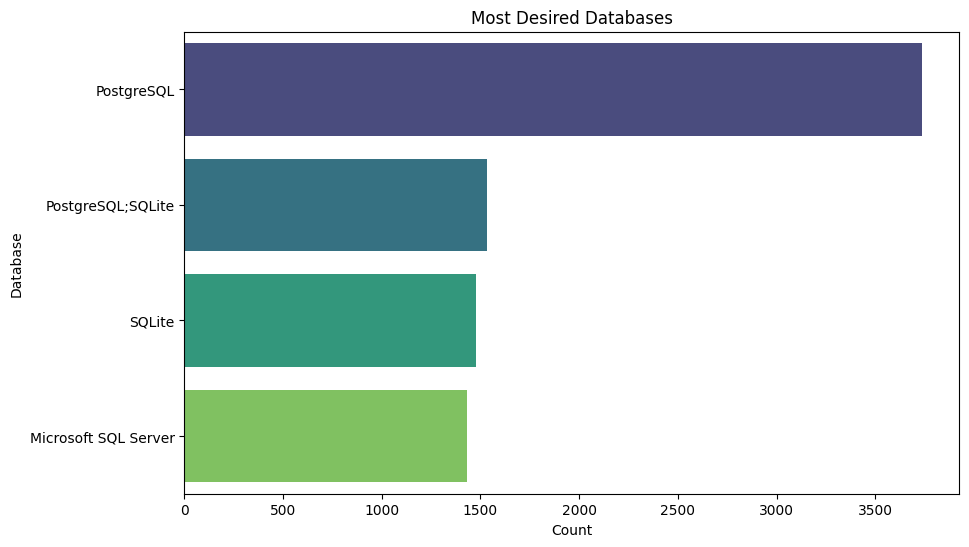

In [19]:
## Write your code here
# Query the data
query = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS Count 
FROM main 
GROUP BY DatabaseWantToWorkWith 
ORDER BY Count DESC 
LIMIT 5;
"""
df = pd.read_sql_query(query, conn)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Count', y='DatabaseWantToWorkWith', palette='viridis')
plt.title('Most Desired Databases')
plt.xlabel('Count')
plt.ylabel('Database')
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_1667/3693465775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Count', y='RemoteWork', palette='magma')


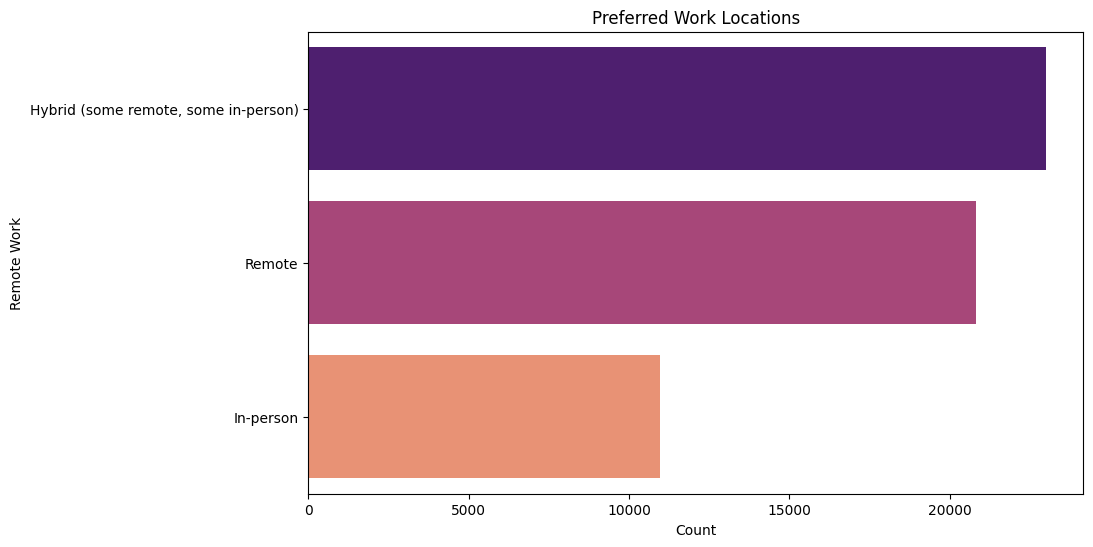

In [20]:
## Write your code here
# Query the data
query = "SELECT RemoteWork, COUNT(*) AS Count FROM main GROUP BY RemoteWork ORDER BY Count DESC;"
df = pd.read_sql_query(query, conn)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Count', y='RemoteWork', palette='magma')
plt.title('Preferred Work Locations')
plt.xlabel('Count')
plt.ylabel('Remote Work')
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


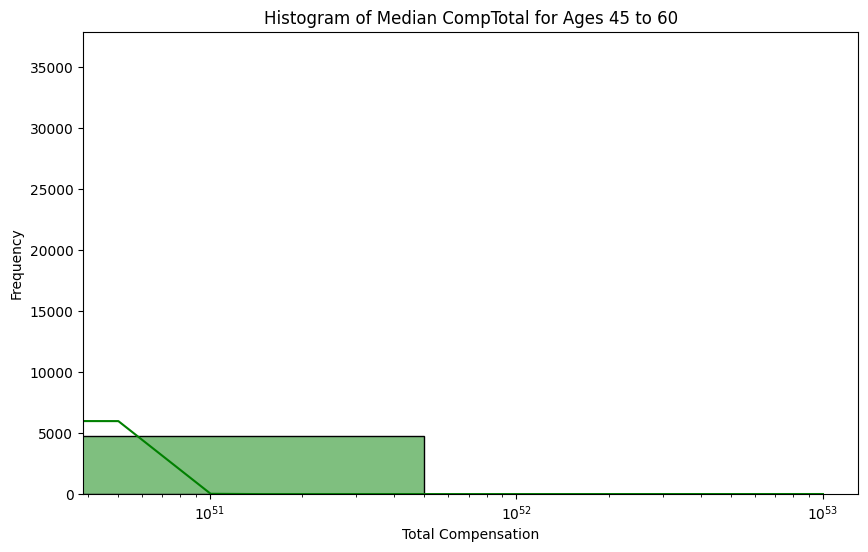

In [21]:
## Write your code here
# Query the data
query = """
SELECT Age, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL 
  AND Age IN ('45-54 years old', '55-64 years old');
"""
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CompTotal', bins=20, kde=True, color='green')
plt.title('Histogram of Median CompTotal for Ages 45 to 60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.xscale('log')  # Use log scale if compensation values are skewed
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_1667/2536855264.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Years of Experience', bbox_to_anchor=(1.05, 1), loc='upper left')


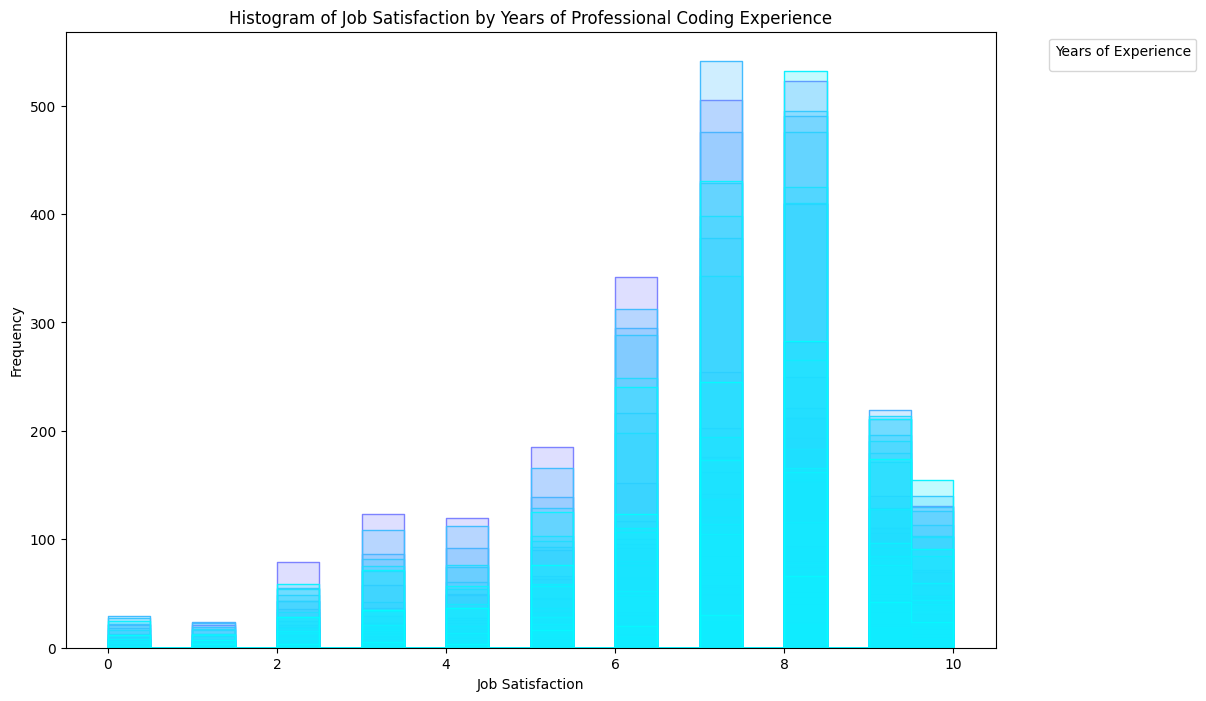

In [22]:
## Write your code here
# Query the data
query = "SELECT YearsCodePro, JobSat FROM main WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL;"
df = pd.read_sql_query(query, conn)

# Plot histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='JobSat', hue='YearsCodePro', bins=20, kde=False, element='step', palette='cool')
plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.legend(title='Years of Experience', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [23]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
